# 2-11-2016
## Li Lin

In [80]:
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Problem 1

$\Gamma = \oint\!\vec{v}\cdot\mathrm{d}\hat{l} = \oint\!\nabla\phi\cdot\mathrm{d}\hat{l} = \oint\!(u_\theta{r}\mathrm{d}\theta+u_r\mathrm{d}r) = 2\pi{r}u_\theta$, since $u_r = 0$.

Then it yields $u = u_\theta = \frac{\Gamma}{2\pi{r}}$.

/home/gil/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in true_divide


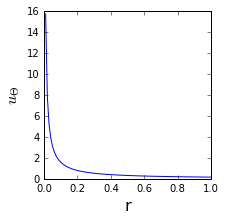

In [81]:
N = 100
r0, rn = 0.0, 1.0
r = np.linspace(r0, rn, N)
gamma = 1.0
u_theta = gamma/(2*math.pi*r)
fsize = 3
plt.figure(figsize=(fsize, (rn-r0)*fsize))
plt.xlabel('r', fontsize=16)
plt.ylabel('$u_{\Theta}$', fontsize=16)
plt.plot(r, u_theta);

## Problem 2
### Question a

$u_v = \frac{\Gamma}{2\pi}\frac{y}{x^2+y^2}$, $v_v = -\frac{\Gamma}{2\pi}\frac{x}{x^2+y^2}$, $u_d = -\frac{\kappa}{2\pi}\frac{x^2-y^2}{(x^2+y^2)^2}$, $v_d = -\frac{\kappa}{2\pi}\frac{2xy}{(x^2+y^2)^2}$, $u_f = U_\infty$, $v_f = 0$.

Then

$u = u_v+u_d+u_f = \frac{\Gamma}{2\pi}\frac{y}{x^2+y^2}-\frac{\kappa}{2\pi}\frac{x^2-y^2}{(x^2+y^2)^2}+U_\infty = 0$,

$v = v_v+v_d+v_f = -\frac{\Gamma}{2\pi}\frac{x}{x^2+y^2}-\frac{\kappa}{2\pi}\frac{2xy}{(x^2+y^2)^2} = 0$.

Recall that $x = R\cos\theta$, $y = R\sin\theta$, and $\frac{\kappa}{2\pi{R^2}} = U_\infty$, then both these two equations above yield $\theta = \arcsin{-}\frac{\Gamma}{4U_\infty\pi{R}}$.

Check this result when $R = 1$, $\Gamma = 9.8696$, and $U_\infty = 1$. The stagnation point should locate at $\theta = -\frac{\pi}{4}$ and $\frac{5\pi}{4}$.

In [82]:
N = 200                                
x0, xn = -4.0, 4.0            
y0, yn = -4.0, 4.0            
x = np.linspace(x0, xn, N)    
y = np.linspace(y0, yn, N)    
X, Y = np.meshgrid(x, y)   
R = 1.
gamma = 9.8696
u_inf = 1.
kappa = 2*math.pi*R**2
x_d, y_d = 0.0, 0.0
x_v, y_v = 0.0, 0.0

In [83]:
def stream_function_doublet(kappa, x_d, y_d, X, Y):
    """Returns the stream-function of a doublet,
    where
    kappa - strength of the doublet,
    x_d, y_d - coordinates of the doublet,
    X, Y - mesh grid.
    """
    psi = -kappa/(2*math.pi)*(Y-y_d)/((X-x_d)**2+(Y-y_d)**2)
    
    return psi

In [84]:
def velocity_doublet(kappa, x_d, y_d, X, Y):
    """Returns the velocity field of a doublet,
    where
    kappa - strength of the doublet,
    x_d, y_d - coordinates of the doublet,
    X, Y - mesh grid.
    """
    u = -kappa/(2*math.pi)*((X-x_d)**2-(Y-y_d)**2)/((X-x_d)**2+(Y-y_d)**2)**2
    v = -kappa/(2*math.pi)*2*(X-x_d)*(Y-y_d)/((X-x_d)**2+(Y-y_d)**2)**2
    
    return u, v

In [85]:
def stream_function_vortex(gamma, x_v, y_v, X, Y):
    """Returns the stream-function of a vortex,
    where
    gamma - strength of the vortex,
    x_v, y_v - coordinates of the vortex,
    X, Y -- mesh grid.
    """
    psi = gamma/(4*math.pi)*np.log((X-x_v)**2+(Y-y_v)**2)
    
    return psi

In [86]:
def velocity_vortex(gamma, x_v, y_v, X, Y):
    """Returns the velocity field of a vortex,
    where
    gamma - strength of the vortex,
    x_v, y_v - coordinates of the vortex,
    X, Y -- mesh grid.
    """
    u = +gamma/(2*math.pi)*(Y-y_v)/((X-x_v)**2+(Y-y_v)**2)
    v = -gamma/(2*math.pi)*(X-x_v)/((X-x_v)**2+(Y-y_v)**2)
    
    return u, v

In [87]:
psi_f = u_inf*Y
psi_v = stream_function_vortex(gamma, x_v, y_v, X, Y)
psi_d = stream_function_doublet(kappa, x_d, y_d, X, Y)
psi = psi_f+psi_v+psi_d
u_d, v_d = velocity_doublet(kappa, x_d, y_d, X, Y)
u_v, v_v = velocity_vortex(gamma, x_v, y_v, X, Y)
u = u_d+u_v+u_inf
v = v_d+v_v

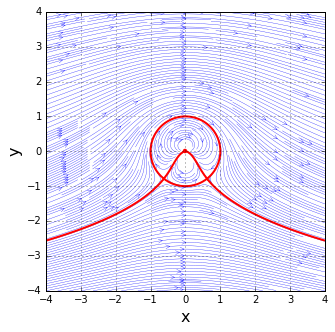

In [88]:
P = 0.5*1*(u_inf**2-u**2-v**2)
fsize = 5
plt.figure(figsize = (fsize,(yn-y0)/(xn-x0)*fsize))
plt.xlabel('x', fontsize = 16)
plt.ylabel('y', fontsize = 16)
plt.xlim(x0, xn)
plt.ylim(y0, yn)
plt.streamplot(X, Y, u, v, density = 4, linewidth = 0.3, arrowsize = 1, arrowstyle = '->')
plt.scatter(x_d, y_d, color = 'red', s = 20, marker = 'o', linewidth = 0)
plt.contour(X, Y, psi, levels=[0.], colors='red', linewidths=2, linestyles='solid');
plt.grid('on')

### Question b

When the circulation increases, the stagnation points move down along the circle. The relation between $\theta$ and $\Gamma$ is $\theta = \arcsin\frac{\Gamma}{constant}$, if other variables are fixed.

### Question c

$\vec{L} = \vec{F}\cdot\hat{y} = (\int_0^{2\pi}P\vec{R}\mathrm{d}\theta)\cdot\hat{y} = -\int_0^{2\pi}PR\sin\theta\mathrm{d}\theta$.

$\vec{D} = \vec{F}\cdot\hat{x} = (\int_0^{2\pi}P\vec{R}\mathrm{d}\theta)\cdot\hat{x} = -\int_0^{2\pi}PR\cos\theta\mathrm{d}\theta$.

### Question d

The Bernoulli's equation:

$\frac{1}{2}\rho{U_\infty^2}+P_\infty = \frac{1}{2}\rho{U^2}+P$, where $P_\infty = 0$, and $\vec{U} = \vec{u}+\vec{v}$.

Then we have

$P = \frac{1}{2}\rho(U_\infty^2-y^2-v^2)$.

Next, find the expressions of velocities. 

$u = u_v+u_d+u_f = \frac{\Gamma}{2\pi}\frac{y}{x^2+y^2}-\frac{\kappa}{2\pi}\frac{x^2-y^2}{(x^2+y^2)^2}+U_\infty$,

$v = v_v+v_d+v_f = -\frac{\Gamma}{2\pi}\frac{x}{x^2+y^2}-\frac{\kappa}{2\pi}\frac{2xy}{(x^2+y^2)^2}$.

Note that $x = R\cos\theta$, $y = R\sin\theta$, $\frac{\Gamma}{2\pi{R}} = u_\theta$, and $\frac{\kappa}{2\pi{R}^2} = U_\infty$.

Then

$u^2 = u_\theta^2\sin^2\theta+u_\infty^2\sin^22\theta+U_\infty^2-2u_\theta{U_\infty}\sin\theta\cos{2\theta}+2u_\theta{U_\infty}\sin\theta-2U_\infty^2\cos{2\theta}$, 

and

$v^2 = u_\theta^2\cos^2\theta+U_\infty^2\sin^22\theta+2u_\theta{U_\infty}\cos\theta\sin{2\theta}$.

Substitude $u^2$ and $v^2$ into the equation of $P$, we have $P = \frac{1}{2}\rho{U_\infty^2}-\frac{1}{2}\rho(u_\theta+2U_\infty\sin\theta)^2$.

### Question e

Substitude $P$ into the expressions of lift and drag, we have

$\vec{L} = -R\int_0^{2\pi}{P}\sin\theta\mathrm{d}\theta = R\rho{u_\theta}U_\infty(\theta-\frac{1}{2}\sin2\theta)\mid_0^{2\pi} = \rho{U_\infty}\Gamma$,

and

$\vec{D} = -R\int_0^{2\pi}P\cos\theta\mathrm{d}\theta = \vec{0}$.

The lift result matches Kutta-Joukwski theorem, and the zero drag also agrees with D'Alembert's result, that no drag when no viscosity.